In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

dataDir = './data' # Change this, according to your images' directory path

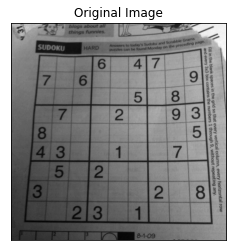

In [2]:
# Opening an image
imgSudoku = cv2.imread(os.path.join(dataDir, 'sudoku.png'), 0) # Change this, according to your image's path
plt.imshow(imgSudoku, cmap="gray")
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.show()

## Edge Detection

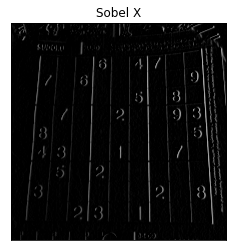

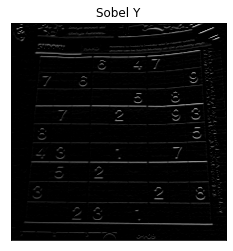

In [3]:
# Using a Sobel Filter
imgWithSobelX = cv2.Sobel(imgSudoku, cv2.CV_64F, 1, 0, ksize=5)
imgWithSobelY = cv2.Sobel(imgSudoku, cv2.CV_64F, 0, 1, ksize=5)

plt.imshow(imgWithSobelX, cmap='gray', vmin=0)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(imgWithSobelY, cmap = 'gray', vmin=0)
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.xticks([]), plt.yticks([])
plt.show()

[Canny Filter](https://docs.opencv.org/master/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de)

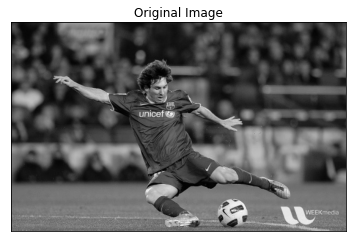

In [12]:
# Opening an image
imgMessi = cv2.imread(os.path.join(dataDir, 'messi.jpg'), 0) # Change this, according to your image's path
plt.imshow(imgMessi, cmap="gray")
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.show()

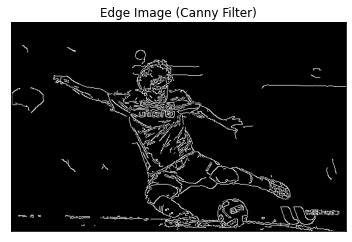

In [13]:
# Using a Canny Filter
imgWithCannyFilter = cv2.Canny(imgMessi, 100, 200) # used the default value for the sigma of the smoothing function

plt.imshow(imgWithCannyFilter, cmap="gray")
plt.title('Edge Image (Canny Filter)')
plt.xticks([]), plt.yticks([])
plt.show()

[Laplacian Filter](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gad78703e4c8fe703d479c1860d76429e6)

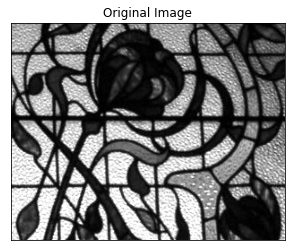

In [14]:
imgWindow = cv2.imread(os.path.join(dataDir, 'window.jpg'), 0) # Change this, according to your image's path
plt.imshow(imgWindow, cmap="gray")
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.show()

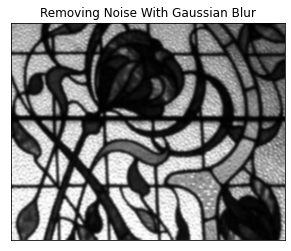

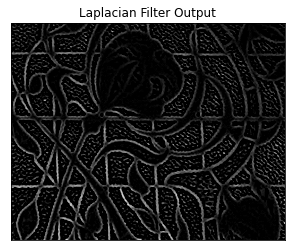

In [15]:
# Removing noise
imgWindow = cv2.GaussianBlur(imgWindow,(3,3),0)
plt.imshow(imgWindow, cmap='gray')
plt.title('Removing Noise With Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.show()

# Applying the Laplacian Filter
imgWithLaplacianFilter = cv2.Laplacian(imgWindow, cv2.CV_64F)

plt.imshow(imgWithLaplacianFilter, cmap='gray', vmin=0)
plt.title('Laplacian Filter Output')
plt.xticks([]), plt.yticks([])
plt.show()

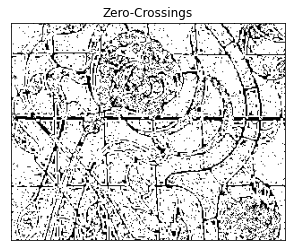

In [16]:
minLoG = cv2.morphologyEx(imgWithLaplacianFilter, cv2.MORPH_ERODE, np.ones((3,3)))
maxLoG = cv2.morphologyEx(imgWithLaplacianFilter, cv2.MORPH_DILATE, np.ones((3,3)))
zeroCross = np.logical_or(np.logical_and(minLoG < 0, imgWithLaplacianFilter > 0), np.logical_and(maxLoG > 0, imgWithLaplacianFilter < 0)) 

plt.imshow(zeroCross, cmap='gray')
plt.title('Zero-Crossings')
plt.xticks([]), plt.yticks([])
plt.show()